In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt  # for plotting
import geopandas as gpd  # for geospatial data handling
from matplotlib.lines import Line2D

# more advanced
from lonboard._map import Map
from lonboard._layer import PolygonLayer  # for mapping in 3D
from lonboard.colormap import (
    apply_categorical_cmap,
    apply_continuous_cmap,
)  # for assigning colors
from palettable.colorbrewer.sequential import PuRd_9  # for color palettes
from matplotlib.colors import LogNorm  # for logarithmic normalization
import pygwalker as pyg  # for creating interactive data visualizations

In [3]:
pluto = gpd.read_file(
    "/Users/alinetheo/Documents/Columbia/Summer 2025/Mapping Systems/Repositories/cdp-mapping-systems/Data/nyc_mappluto_25v1_1_shp/MapPLUTO.shp"
)

In [4]:
pluto.head()

,Borough,Block,Lot,CD,BCT2020,BCTCB2020,CT2010,CB2010,SchoolDist,Council,...,FIRM07_FLA,PFIRM15_FL,Version,DCPEdited,Latitude,Longitude,Notes,Shape_Leng,Shape_Area,geometry
0,MN,1,10,101,1000500,10005000003,5,1000,02,1,...,1,1,25v1.1,None,40.688774,-74.018704,None,0.0,7.414502e+06,"POLYGON ((980898.728 191409.779, 980881.798 19..."
1,MN,1,101,101,1000100,10001001001,1,1001,02,1,...,None,1,25v1.1,None,40.689920,-74.045337,None,0.0,5.018973e+05,"MULTIPOLYGON (((972428.829 190679.175, 972443...."
2,MN,1,201,101,1000100,10001001000,1,1000,02,1,...,None,1,25v1.1,None,40.698188,-74.041329,None,0.0,1.148539e+06,"POLYGON ((973648.066 193711.894, 973525.342 19..."
3,MN,2,1,101,1000900,10009001022,9,1025,02,1,...,1,1,25v1.1,t,40.700369,-74.012911,None,0.0,1.008250e+05,"POLYGON ((980609.55 194220.422, 980608.726 194..."
4,MN,2,2,101,1000900,10009001022,9,1025,02,1,...,1,1,25v1.1,None,40.700550,-74.011588,None,0.0,8.724419e+04,"POLYGON ((980854.138 194531.437, 980823.199 19..."


In [5]:
pluto.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'BCT2020', 'BCTCB2020', 'CT2010',
       'CB2010', 'SchoolDist', 'Council', 'ZipCode', 'FireComp', 'PolicePrct',
       'HealthCent', 'HealthArea', 'Sanitboro', 'SanitDistr', 'SanitSub',
       'Address', 'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4',
       'Overlay1', 'Overlay2', 'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight',
       'SplitZone', 'BldgClass', 'LandUse', 'Easements', 'OwnerType',
       'OwnerName', 'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea',
       'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea',
       'AreaSource', 'NumBldgs', 'NumFloors', 'UnitsRes', 'UnitsTotal',
       'LotFront', 'LotDepth', 'BldgFront', 'BldgDepth', 'Ext', 'ProxCode',
       'IrrLotCode', 'LotType', 'BsmtCode', 'AssessLand', 'AssessTot',
       'ExemptTot', 'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist',
       'Landmark', 'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode',
       'BBL', 'CondoNo', 'Tract2

In [6]:
list(pluto.dtypes)

[dtype('O'),
 dtype('int64'),
 dtype('int32'),
 dtype('int32'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int32'),
 dtype('int64'),
 dtype('O'),
 dtype('int32'),
 dtype('int32'),
 dtype('int32'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int32'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int32'),
 dtype('int32'),
 dtype('int32'),
 dtype(

In [7]:
# a great way to get a sense of a field is to look at
# the frequency of values in a categorical field.
# here, we look at the LandUse field, which describes the
# type of land use for each property in the dataset.
pluto.LandUse.value_counts()

LandUse
01    566504
02    131336
04     56138
11     24464
05     21207
03     13021
08     12045
06      9385
10      9277
07      6036
09      4740
Name: count, dtype: int64

In [8]:
land_use_codes = {
    "01": "One & Two Family Buildings",
    "02": "Multi-Family Walk-Up Buildings",
    "03": "Multi-Family Elevator Buildings",
    "04": "Mixed Residential & Commercial Buildings",
    "05": "Commercial & Office Buildings",
    "06": "Industrial & Manufacturing",
    "07": "Transportation & Utility",
    "08": "Public Facilities & Institutions",
    "09": "Open Space & Outdoor Recreation",
    "10": "Parking Facilities",
    "11": "Vacant Land",
}

In [9]:
pluto["LandUse"] = pluto.LandUse.map(land_use_codes)

In [10]:
# now when we perform operations on the LandUse field,
# we can use the more meaningful names.
# let's look at the frequency of values in the LandUse field again
pluto.LandUse.value_counts()

LandUse
One & Two Family Buildings                  566504
Multi-Family Walk-Up Buildings              131336
Mixed Residential & Commercial Buildings     56138
Vacant Land                                  24464
Commercial & Office Buildings                21207
Multi-Family Elevator Buildings              13021
Public Facilities & Institutions             12045
Industrial & Manufacturing                    9385
Parking Facilities                            9277
Transportation & Utility                      6036
Open Space & Outdoor Recreation               4740
Name: count, dtype: int64

In [11]:
# now when we perform operations on the LandUse field,
# we can use the more meaningful names.
# let's look at the frequency of values in the LandUse field again
pluto.LandUse.value_counts()

LandUse
One & Two Family Buildings                  566504
Multi-Family Walk-Up Buildings              131336
Mixed Residential & Commercial Buildings     56138
Vacant Land                                  24464
Commercial & Office Buildings                21207
Multi-Family Elevator Buildings              13021
Public Facilities & Institutions             12045
Industrial & Manufacturing                    9385
Parking Facilities                            9277
Transportation & Utility                      6036
Open Space & Outdoor Recreation               4740
Name: count, dtype: int64

In [12]:
# more complex grouping
# We can also use the `agg()` function to apply multiple aggregation functions to different columns at once.
# For example, we can calculate the total lot area and the average building area for each land use type:
landuse_summary = (
    pluto.groupby("LandUse")
    .agg({"LotArea": "sum", "BldgArea": "mean"})
    .reset_index()
    .rename(
        columns={"LotArea": "Total Lot Area", "BldgArea": "Average Building Area"},
    )
)
landuse_summary

,LandUse,Total Lot Area,Average Building Area
0,Commercial & Office Buildings,275510919,38504.041260
1,Industrial & Manufacturing,224261013,20714.436548
2,Mixed Residential & Commercial Buildings,268383490,18362.646692
3,Multi-Family Elevator Buildings,354474758,87686.372322
4,Multi-Family Walk-Up Buildings,481826111,5628.188989
5,One & Two Family Buildings,1828691192,1890.239642
6,Open Space & Outdoor Recreation,1637319069,7589.837975
7,Parking Facilities,83393001,3015.826776
8,Public Facilities & Institutions,520642831,46141.331092
9,Transportation & Utility,641595331,12994.121935


Text(0.5, 1.0, 'Total lot area by land use type')

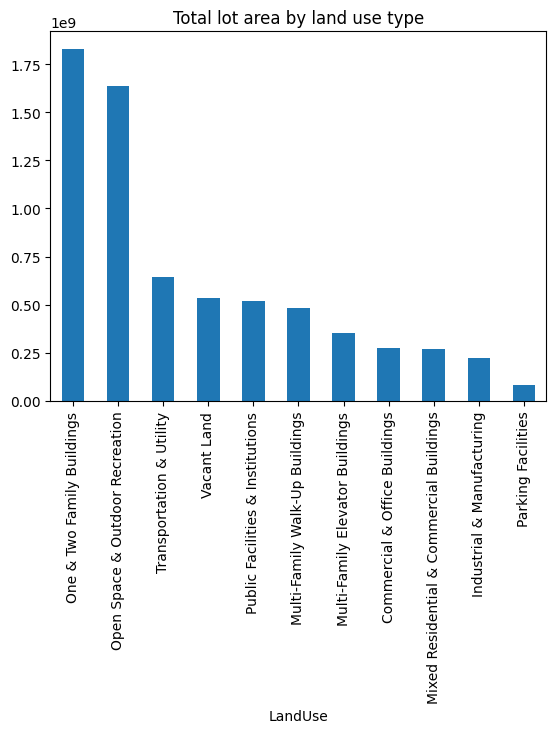

In [13]:
# there are many ways to visualize this data, and levels to refining the graphic style.
# This is the simplest possible example, using matplotlib to create a bar chart
pluto.groupby("LandUse").LotArea.sum().sort_values(ascending=False).plot.bar()
plt.title("Total lot area by land use type")

Text(0.5, 1.0, 'Total building area by land use type')

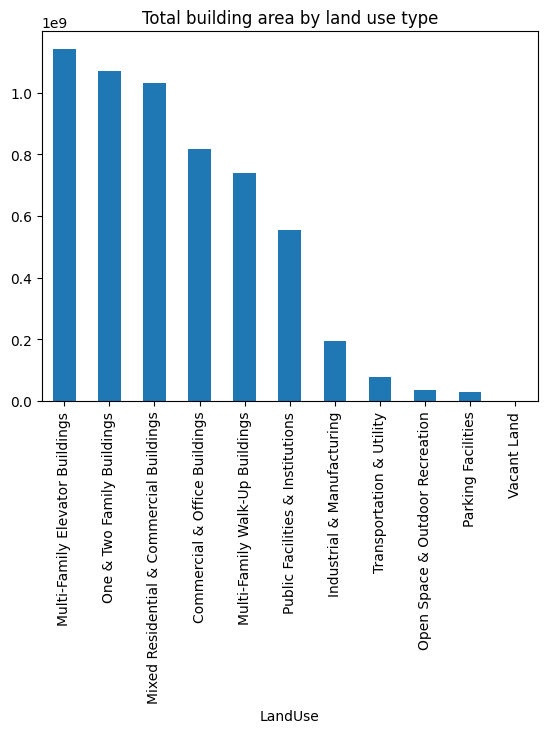

In [14]:
# now the same but for building area - note this is total building area, not average
pluto.groupby("LandUse").BldgArea.sum().sort_values(ascending=False).plot.bar()
plt.title("Total building area by land use type")

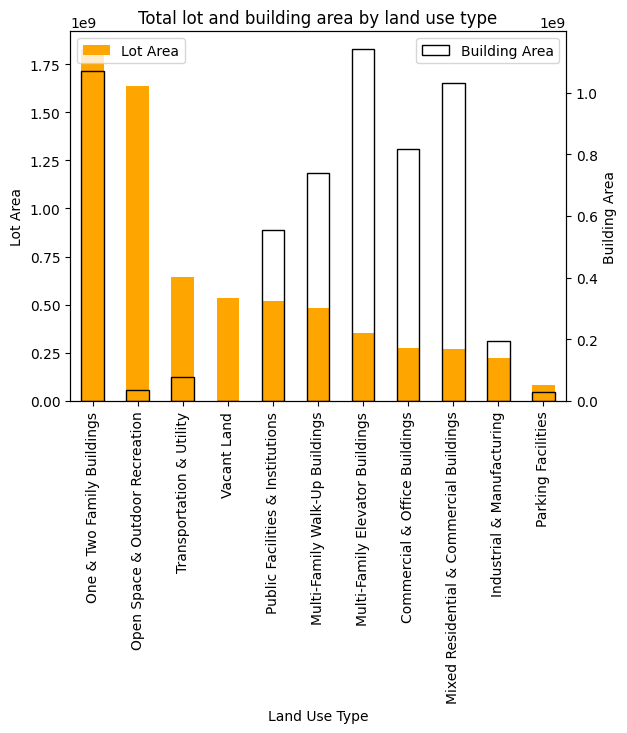

In [15]:
# plot both lot and building area on the same plot with a secondary y-axis
fig, ax = plt.subplots()
by_lot_area = pluto.groupby("LandUse").LotArea.sum().sort_values(ascending=False)

by_lot_area.plot.bar(ax=ax, color="orange")

# get order to apply below
order = {v: i for i, v in enumerate(by_lot_area.index)}

ax.set_ylabel("Lot Area")
ax.set_xlabel("Land Use Type")

ax2 = ax.twinx()
pluto.groupby("LandUse").BldgArea.sum().reindex(by_lot_area.index).plot.bar(
    ax=ax2, edgecolor="black", color="none"
)
ax2.set_ylabel("Building Area")

plt.title("Total lot and building area by land use type")

# add legends
ax.legend(["Lot Area"], loc="upper left")
ax2.legend(["Building Area"], loc="upper right")

In [16]:
pluto["NumFloors"].describe()

count    856734.000000
mean          2.362320
std           2.053639
min           0.000000
25%           2.000000
50%           2.000000
75%           2.500000
max         342.870000
Name: NumFloors, dtype: float64

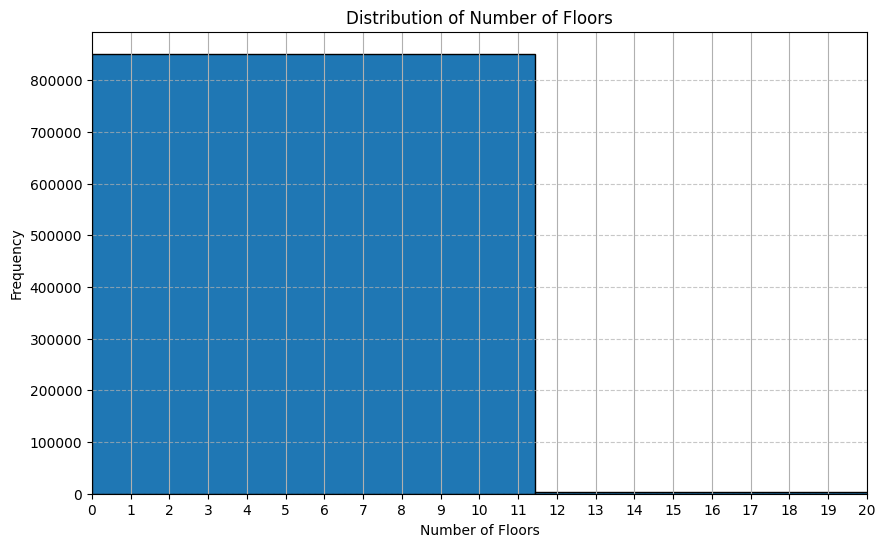

In [17]:
# We can see that the average number of floors is 2.35, but the maximum is 104! and that the majority of buildings have 1-3 floors.
# Let's visualize the distribution of the number of floors using a histogram
plt.figure(figsize=(10, 6))
pluto["NumFloors"].hist(bins=30, edgecolor="black")
plt.title("Distribution of Number of Floors")
plt.xlabel("Number of Floors")
plt.ylabel("Frequency")
plt.xlim(0, 20)  # limit x-axis to 20 for better visibility
plt.xticks(range(0, 21))  # set x-ticks to integers from 0 to 20
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [26]:
# pygwalker doesn't suppert geospatial data directly, so we need to drop the geometry column.
# Be sure to keep a copy of the original data, we'll need it later!
pluto_non_spatial = pluto.drop(columns=["geometry"])

# Invoke pygwalker, begin exploring the data interactively
pyg.walk(pluto_non_spatial)

Box(children=(HTML(value='\n<div id="ifr-pyg-0006390e9857f8356fvgac4M5Hp8zxou" style="height: auto">\n    <hea…

Text(0.5, 1.0, 'NYC MapPLUTO')

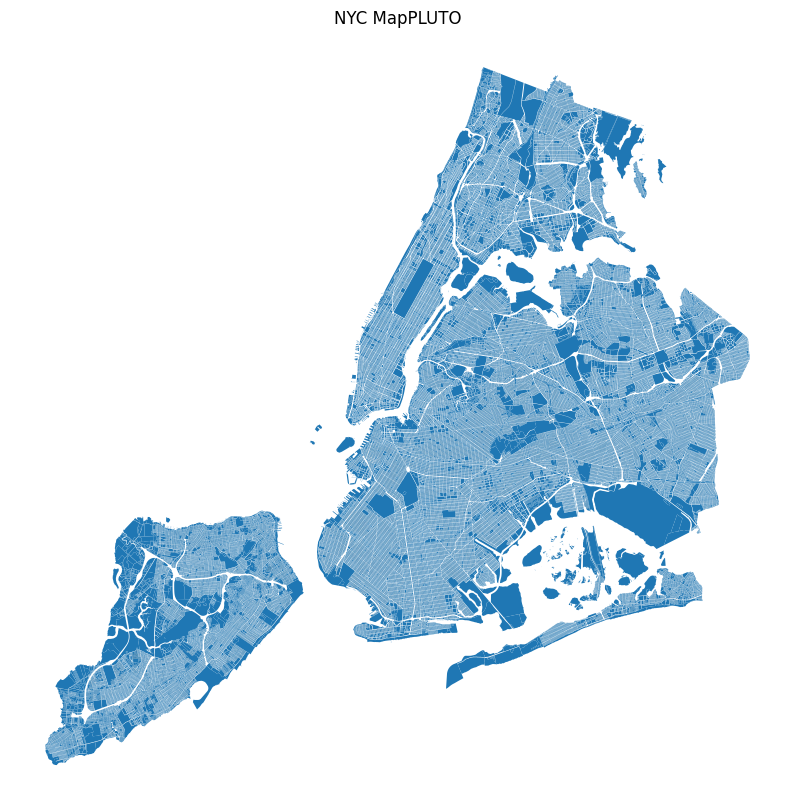

In [18]:
# In this example, we are using matplotlib to map our pluto data.
# Under the hood, matplotlib is drawing each individual polygon (>800,000),
# which is resource intensive and hard to discern on a map! This is a good
# place to start, but we'll soon move on to more advanced mapping techniques.


pluto.plot(figsize=(10, 10)).set_axis_off()
plt.title("NYC MapPLUTO")

In [20]:
cmap = {
    "One & Two Family Buildings": "#ffff00",
    "Multi-Family Walk-Up Buildings": "#fffb00",
    "Multi-Family Elevator Buildings": "#ffc800",
    "Mixed Residential & Commercial Buildings": "#ff4000",
    "Commercial & Office Buildings": "#ff0000",
    "Industrial & Manufacturing": "#7700ff",
    "Transportation & Utility": "#808080",
    "Public Facilities & Institutions": "#001580",
    "Open Space & Outdoor Recreation": "#219F21",
    "Parking Facilities": "#A6A6AB",
    "Vacant Land": "#222222",
    "Unknown": "#000000",
}

In [21]:
pluto.fillna({"LandUse": "Unknown"}, inplace=True)

In [22]:
pluto.LandUse.unique()

array(['Public Facilities & Institutions', 'Unknown',
       'Transportation & Utility', 'Commercial & Office Buildings',
       'Open Space & Outdoor Recreation',
       'Mixed Residential & Commercial Buildings',
       'Multi-Family Elevator Buildings', 'Vacant Land',
       'Industrial & Manufacturing', 'Parking Facilities',
       'One & Two Family Buildings', 'Multi-Family Walk-Up Buildings'],
      dtype=object)

In [23]:
# here we make a new column called "color" that maps the LandUse values to colors
pluto["color"] = pluto["LandUse"].map(cmap)

In [24]:
pluto["color"].unique()

array(['#001580', '#000000', '#808080', '#ff0000', '#219F21', '#ff4000',
       '#ffc800', '#222222', '#7700ff', '#A6A6AB', '#ffff00', '#fffb00'],
      dtype=object)

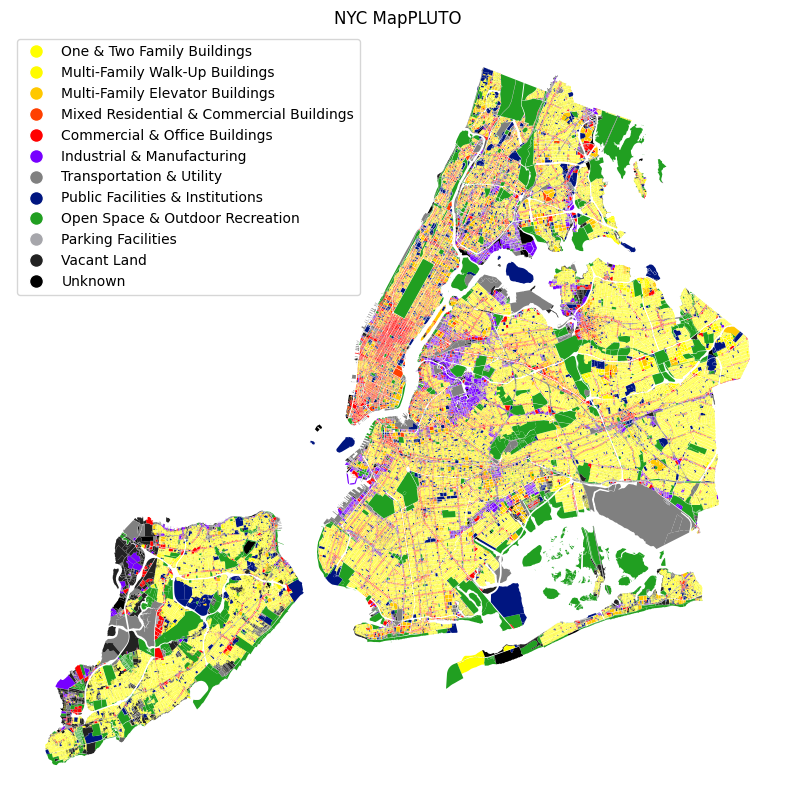

In [25]:
ax = pluto.plot(
    color=pluto["color"],
    figsize=(10, 10),
    legend=True,
).set_axis_off()
plt.title("NYC MapPLUTO")


# populate legend items based on dict from above
legend_colors = [
    Line2D([0], [0], marker="o", color="w", markerfacecolor=c, markersize=10)
    for c in cmap.values()
]
labels = cmap.keys()
plt.legend(legend_colors, labels, loc="upper left")

<Axes: ylabel='Frequency'>

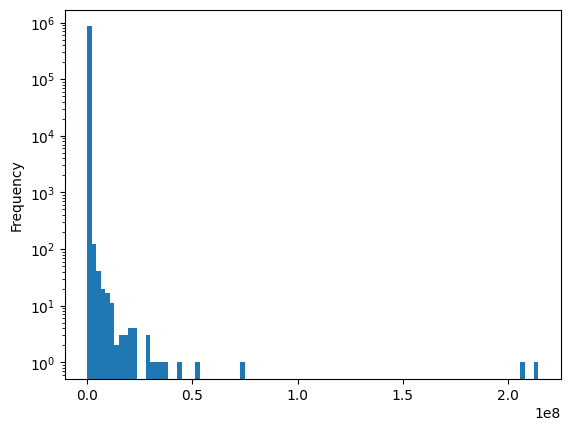

In [27]:
pluto.LotArea.plot.hist(bins=100, log=True)

In [29]:
pluto_wgs = pluto.to_crs("epsg:4326")  # 3857

In [30]:
cmap_rgb = {k: list(int(v[i : i + 2], 16) for i in (1, 3, 5)) for k, v in cmap.items()}

In [31]:
cmap_rgb

{'One & Two Family Buildings': [255, 255, 0],
 'Multi-Family Walk-Up Buildings': [255, 251, 0],
 'Multi-Family Elevator Buildings': [255, 200, 0],
 'Mixed Residential & Commercial Buildings': [255, 64, 0],
 'Commercial & Office Buildings': [255, 0, 0],
 'Industrial & Manufacturing': [119, 0, 255],
 'Transportation & Utility': [128, 128, 128],
 'Public Facilities & Institutions': [0, 21, 128],
 'Open Space & Outdoor Recreation': [33, 159, 33],
 'Parking Facilities': [166, 166, 171],
 'Vacant Land': [34, 34, 34],
 'Unknown': [0, 0, 0]}

In [32]:
len(pluto_wgs[pluto_wgs["LandUse"].isna()])

0

In [33]:
pluto.fillna({"LandUse": "Unknown"}, inplace=True)

In [34]:
df = pluto_wgs[["LandUse", "geometry"]].copy()
df["LandUse"] = df["LandUse"].astype("category")

layer = PolygonLayer.from_geopandas(
    df[["LandUse", "geometry"]],
    get_fill_color=apply_categorical_cmap(
        df["LandUse"],
        cmap=cmap_rgb,
    ),
)
m = Map(layer)
m

Map(layers=[PolygonLayer(get_fill_color=<pyarrow.lib.FixedSizeListArray object at 0x13354e2c0>
[
  [
    0,
  …

In [35]:
df = pluto_wgs[["NumFloors", "geometry"]]

normalizer = LogNorm(1, df.NumFloors.max(), clip=True)
normalized_floors = normalizer(df.NumFloors)

layer = PolygonLayer.from_geopandas(
    df[["NumFloors", "geometry"]],
    get_fill_color=apply_continuous_cmap(normalized_floors, cmap=PuRd_9),
)
m = Map(layer)
m

Map(layers=[PolygonLayer(get_fill_color=<pyarrow.lib.FixedSizeListArray object at 0x13354e320>
[
  [
    217,
…

In [36]:
df = pluto_wgs[["NumFloors", "geometry"]]

normalizer = LogNorm(1, df.NumFloors.max(), clip=True)
normalized_floors = normalizer(df.NumFloors)


layer = PolygonLayer.from_geopandas(
    df[["NumFloors", "geometry"]],
    get_fill_color=apply_continuous_cmap(normalized_floors, cmap=PuRd_9),
    extruded=True,
    get_elevation=pluto_wgs["NumFloors"] * 14,
)
m = Map(
    layer, view_state={"longitude": -73.97, "latitude": 40.73, "zoom": 10, "pitch": 45}
)
m

Map(layers=[PolygonLayer(extruded=True, get_elevation=<pyarrow.lib.FloatArray object at 0x13354f7c0>
[
  49,
 …

In [37]:
df = pluto_wgs[pluto_wgs.YearBuilt > 2010][["NumFloors", "geometry"]].copy()

normalizer = LogNorm(1, df.NumFloors.max(), clip=True)
normalized_floors = normalizer(df.NumFloors)

layer = PolygonLayer.from_geopandas(
    df[["NumFloors", "geometry"]],
    get_fill_color=apply_continuous_cmap(normalized_floors, cmap=PuRd_9),
    extruded=True,
    get_elevation=df["NumFloors"] * 14,
)
m = Map(layer)
m

Map(layers=[PolygonLayer(extruded=True, get_elevation=<pyarrow.lib.FloatArray object at 0x1334a4220>
[
  378,
…

In [38]:
pluto_wgs.YearBuilt.nunique()

253

In [39]:
def categorize_buildings(r):
    if r.YearBuilt < 1900:
        return "Pre-1900"
    elif r.YearBuilt < 1950:
        return "1900-1950"
    elif r.YearBuilt < 2000:
        return "1950-2000"
    else:
        return "Post-2000"

In [40]:
pluto_wgs["year_category"] = pluto_wgs.apply(categorize_buildings, axis=1)

In [41]:
pluto_wgs.year_category.value_counts()

year_category
1900-1950    481841
1950-2000    231024
Pre-1900      78682
Post-2000     65187
Name: count, dtype: int64

In [42]:
year_built_ma = {
    "Pre-1900": "[255,0,0]",
    "1900-1950": "#00ff00",
    "1950-2000": "#0000ff",
    "Post-2000": "#ff00ff",
}

In [43]:
df = pluto_wgs[["year_category", "geometry"]]

layer = PolygonLayer.from_geopandas(
    df[["year_category", "geometry"]],
    get_fill_color=apply_categorical_cmap(df["year_category"], cmap=cmap_rgb),
)
m = Map(layer)
m

KeyError: '1900-1950'